In [136]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [137]:
data = pd.read_csv("stroke.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Cleaning of data

From the data, we see that there are null values in the smoking_status column

The description of the columns are as follows:

Column | Description | Info
:-|:-|:-
id| Patient ID number    
gender| Gender of the patient| ("Male", "Female" or "Other")
age| Age of the patient | 
hypertension| Whether the patient has hypertension| (0: No hypertension, 1: Has hypertension)   
heart_disease| Whether the patient has heart disease| (0: No heart disease, 1: Has heart disease)
ever_married| Whether the patient is married| ("No" or "Yes")
work_type| Working type of patient| ("children", "Govt_job", "Never_worked", "Private" or "Self-employed")
Residence_type| Resident type of patient| ("Rural" or "Urban")
avg_glucose_level| Average glucose level in blood of patient
bmi| Body Mass Index of patient
smoking_status| Whether patient smoke| ("formerly smoked", "never smoked", "smokes" or "Unknown")
stroke| Whether the patient has a stroke| (0: No stroke, 1: Has stroke)

In [139]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### Observations
With 43400 data points, the dataset has a sufficient number of data points. Generally the dataset looks fine.

However, in order to resolve the following issues with the dataset, we still need to do the following:
* Handling unbalanced data
* Remove unnecessary columns
* Encoding gender column
* Remove outliers
* Categorising the glucose_level column
* Filling the NULL data in some of the columns

---

# Handling unbalanced data
From the dataset, we see that a significant amount of patients do not have stroke. This causes an imbalance in the data. To resolve this issue, we perform random under-sampling on the patients without stroke

In [140]:
# class count
class_count_0, class_count_1 = data['stroke'].value_counts()

# Separate class
class_0 = data[data['stroke'] == 0]
class_1 = data[data['stroke'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (42617, 12)
class 1: (783, 12)


total class of 1 and 0: 0    783
1    783
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'count (stroke)'}>

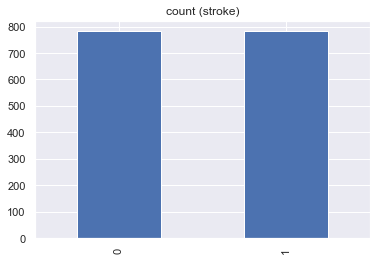

In [141]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['stroke'].value_counts())# plot the count after under-sampeling
test_under['stroke'].value_counts().plot(kind='bar', title='count (stroke)')

In [142]:
data = test_under.copy()

# Cleaning of data

### Removing unnecessary columns
In order to match the variables in the cardiovascular dataset, we remove the unnecessary variables 

In [143]:
for i in ['id', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']:
    data.drop([i], axis='columns', inplace=True)

data.head()

,gender,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke
30272,Female,61.0,0,93.54,NaN,smokes,0
19144,Male,42.0,1,72.22,28.6,smokes,0
38316,Female,22.0,0,102.03,31.2,smokes,0
30132,Female,3.0,0,100.56,21.5,NaN,0
12974,Male,14.0,0,66.15,22.9,NaN,0


### Removing outliers
We notice that in the age, avg_glucose_level and bmi columns, the min and max have unrealistic values.
We assume that 5% of the dataset are outliers, and remove the entries that lie in the top 2.5% and bottom 2.5%, this will remove the unrealistic min and max values as well

In [144]:
age_outliers = data[(data['age'] > data['age'].quantile(0.975)) | 
                  (data['age'] < data['age'].quantile(0.025))].index

glucose_outliers = data[(data['avg_glucose_level'] > data['avg_glucose_level'].quantile(0.975)) | 
                  (data['avg_glucose_level'] < data['avg_glucose_level'].quantile(0.025))].index

bmi_outliers   = data[(data['bmi'] > data['bmi'].quantile(0.975)) | 
                  (data['bmi'] < data['bmi'].quantile(0.025))].index

In [145]:
toremove = set(list(age_outliers) + list(glucose_outliers) + list(bmi_outliers))

data.drop(toremove, inplace=True)
data.describe()

,age,hypertension,avg_glucose_level,bmi,stroke
count,1398.000000,1398.000000,1398.000000,1233.000000,1398.000000
mean,56.814020,0.174535,115.387883,29.193998,0.516452
std,20.365129,0.379705,50.244819,5.982634,0.499908
min,4.000000,0.000000,59.220000,16.500000,0.000000
25%,44.000000,0.000000,79.350000,24.800000,0.000000
50%,60.000000,0.000000,95.320000,28.700000,1.000000
75%,75.000000,0.000000,134.622500,32.900000,1.000000
max,82.000000,1.000000,237.020000,45.900000,1.000000


### Encoding gender column

In [146]:
data['gender'].describe()

count       1398
unique         2
top       Female
freq         793
Name: gender, dtype: object

In [147]:
# For those whose gender is other, we will assume they are female. 
# This is because both datasets contain more females to males, we follow the majority gender.

data.replace(to_replace=r'Other', value='Female', regex=True, inplace=True)

#Check that there are only 2 unique values after replacing
data['gender'].describe()

count       1398
unique         2
top       Female
freq         793
Name: gender, dtype: object

In [148]:
#Encoding the Gender variable
genders = pd.get_dummies(data.gender)
genders.rename(columns={"Female": "female", "Male": "male"}, inplace=True)

#Concat to our original dataframe
data = pd.concat([data, genders], axis=1)
data = data.drop(["gender"], axis=1)
data.head()

,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,female,male
30272,61.0,0,93.54,NaN,smokes,0,1,0
19144,42.0,1,72.22,28.6,smokes,0,0,1
38316,22.0,0,102.03,31.2,smokes,0,1,0
12974,14.0,0,66.15,22.9,NaN,0,0,1
3144,4.0,0,83.13,16.8,NaN,0,0,1


### Chaning age to int64 type

In [149]:
data['age'] = data['age'].astype(np.int64)

data.head()

,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,female,male
30272,61,0,93.54,NaN,smokes,0,1,0
19144,42,1,72.22,28.6,smokes,0,0,1
38316,22,0,102.03,31.2,smokes,0,1,0
12974,14,0,66.15,22.9,NaN,0,0,1
3144,4,0,83.13,16.8,NaN,0,0,1


### Categorising the glucose_level column

![title](img/glucose.png)

From the above table, we use the fasting glucose_level column as we assume the patients took the
measurements when fasting.
We can categorise the glucose levels as follows:
* Normal (<= 100): 1       
* Pre-diabetic (101-125): 2 
* Diabetic (>= 126): 3     

In [150]:
data['avg_glucose_level'] = data['avg_glucose_level'].apply(lambda x: 1 if x <= 100 else 2 if x <= 125 else 3)
data.rename(columns={"avg_glucose_level": "gluc"}, inplace=True)

data.head()

,age,hypertension,gluc,bmi,smoking_status,stroke,female,male
30272,61,0,1,NaN,smokes,0,1,0
19144,42,1,1,28.6,smokes,0,0,1
38316,22,0,2,31.2,smokes,0,1,0
12974,14,0,1,22.9,NaN,0,0,1
3144,4,0,1,16.8,NaN,0,0,1


### Filling the NULL data in some of the columns

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 30272 to 43339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1398 non-null   int64  
 1   hypertension    1398 non-null   int64  
 2   gluc            1398 non-null   int64  
 3   bmi             1233 non-null   float64
 4   smoking_status  1081 non-null   object 
 5   stroke          1398 non-null   int64  
 6   female          1398 non-null   uint8  
 7   male            1398 non-null   uint8  
dtypes: float64(1), int64(4), object(1), uint8(2)
memory usage: 79.2+ KB


We notice that there are NULL values in bmi and smoking status

In [152]:
data.isnull().sum()

age                 0
hypertension        0
gluc                0
bmi               165
smoking_status    317
stroke              0
female              0
male                0
dtype: int64

In [153]:
# We fill the null values in bmi using the mean, since we have previously removed the outliers in the dataset
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 30272 to 43339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1398 non-null   int64  
 1   hypertension    1398 non-null   int64  
 2   gluc            1398 non-null   int64  
 3   bmi             1398 non-null   float64
 4   smoking_status  1081 non-null   object 
 5   stroke          1398 non-null   int64  
 6   female          1398 non-null   uint8  
 7   male            1398 non-null   uint8  
dtypes: float64(1), int64(4), object(1), uint8(2)
memory usage: 79.2+ KB


In [154]:
# For smoking status, we take a look at the different values
data['smoking_status'].value_counts()

never smoked       533
formerly smoked    310
smokes             238
Name: smoking_status, dtype: int64

never smoked will be replaced with 0 (non-smoker), while formerly smoked and formerly smoked will be replaced with 1 (smoker).
We will treat null values as non-smokers

In [155]:
mapping = {"never smoked": 0, "formerly smoked": 1, "smokes": 1}

#mapping maps the value to the categorical value, NaN values will be defaulted to 0
data['smoking_status'] = data['smoking_status'].apply(lambda x: mapping.get(x, 0))
data.rename(columns={"smoking_status": "smoke"}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 30272 to 43339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1398 non-null   int64  
 1   hypertension  1398 non-null   int64  
 2   gluc          1398 non-null   int64  
 3   bmi           1398 non-null   float64
 4   smoke         1398 non-null   int64  
 5   stroke        1398 non-null   int64  
 6   female        1398 non-null   uint8  
 7   male          1398 non-null   uint8  
dtypes: float64(1), int64(5), uint8(2)
memory usage: 79.2 KB


In [156]:
for i in ['gluc', 'smoke', 'stroke', 'hypertension', 'female', 'male']:
    data[i] = data[i].astype("category")

In [157]:
data = data[['age', 'gluc', 'smoke', 'bmi', 'hypertension', 'female', 'male', 'stroke']]
data

,age,gluc,smoke,bmi,hypertension,female,male,stroke
30272,61,1,1,29.193998,0,1,0,0
19144,42,1,1,28.600000,1,0,1,0
38316,22,2,1,31.200000,0,1,0,0
12974,14,1,0,22.900000,0,0,1,0
3144,4,1,0,16.800000,0,0,1,0
...,...,...,...,...,...,...,...,...
43148,56,1,1,32.900000,0,1,0,1
43268,69,1,0,28.000000,0,0,1,1
43304,80,1,0,26.700000,0,1,0,1
43318,62,1,1,31.500000,1,0,1,1


---

# Predicting cardio variable
We will use back our model after hypertuning the variables, and use our data in cardio.csv as the train data.   
Subsequently, we will predict whether the patient has cardiovascular disease in our current stroke dataset

In [158]:
#Retrive cardio dataset from the other notebook

%store -r cardio
%store -r final_cl

In [159]:
cardio.head()

,age,gluc,smoke,cardio,bmi,hypertension,female,male
0,50,1,0,0,21.967120,0,0,1
1,55,1,0,1,34.927679,1,1,0
2,51,1,0,1,23.507805,0,1,0
3,48,1,0,1,28.710479,1,0,1
4,47,1,0,0,23.011177,0,1,0


In [160]:
import xgboost as xgb

X, y = cardio.copy().drop('cardio', axis=1), cardio.cardio

final_cl.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              disable_default_eval_metric=True, enable_categorical=True,
              gamma=0.5, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.09, reg_lambda=0.95, scale_pos_weight=1,
              subsample=0.95, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [161]:
tempX = data.drop('stroke', axis=1)
predicted = pd.DataFrame(final_cl.predict(tempX))
predicted.describe()

temp = data.copy().reset_index()

new = pd.concat([temp, predicted], axis=1)
new = new.rename(columns={0: 'cardio'}).drop(['index'], axis='columns')
new['cardio'] = new['cardio'].astype("category")
new

,age,gluc,smoke,bmi,hypertension,female,male,stroke,cardio
0,61,1,1,29.193998,0,1,0,0,1
1,42,1,1,28.600000,1,0,1,0,1
2,22,2,1,31.200000,0,1,0,0,0
3,14,1,0,22.900000,0,0,1,0,0
4,4,1,0,16.800000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1393,56,1,1,32.900000,0,1,0,1,1
1394,69,1,0,28.000000,0,0,1,1,1
1395,80,1,0,26.700000,0,1,0,1,1
1396,62,1,1,31.500000,1,0,1,1,1


---
### Visualising the new dataset

In [162]:
new.describe()

,age,bmi
count,1398.000000,1398.000000
mean,56.814020,29.193998
std,20.365129,5.618231
min,4.000000,16.500000
25%,44.000000,25.400000
50%,60.000000,29.193998
75%,75.000000,32.300000
max,82.000000,45.900000


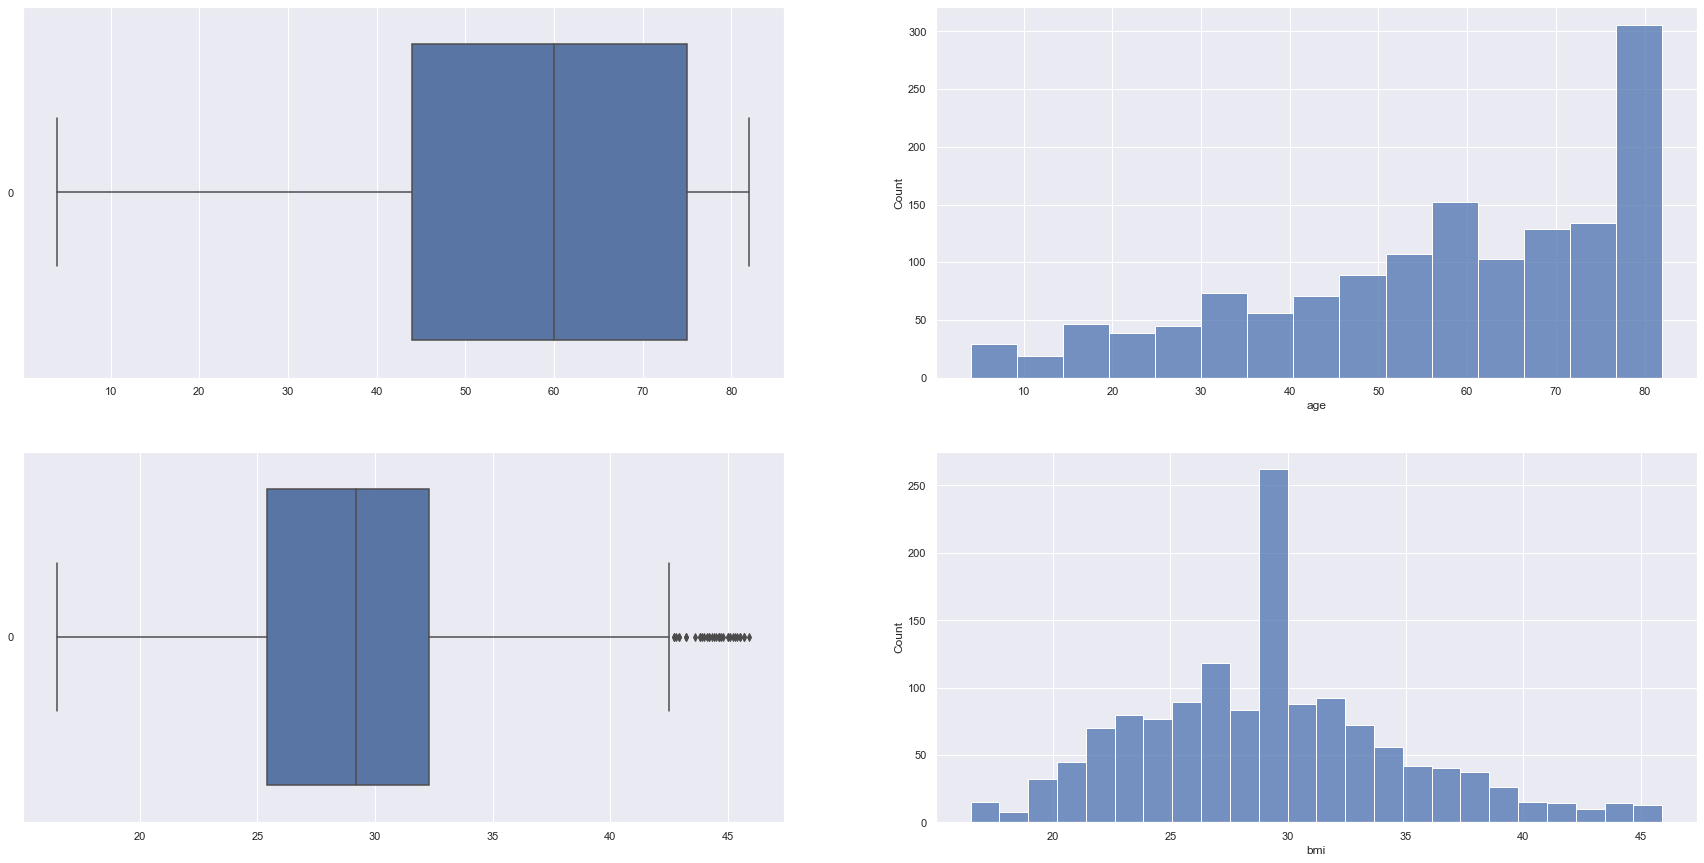

In [163]:
#Visualing the numeric variables
f,axes = plt.subplots(2, 2, figsize=(30, 15))

for i,val in enumerate(["age", "bmi"]):
    sb.boxplot(data = new[val], orient = "h", ax = axes[i][0])
    sb.histplot(data = new[val], ax = axes[i][1])

### Observations:

#### Age 
* There is a range of values between 5 to 82 years old. The median is 60, with lower quartile 42 and upper quartile 75
* We see that majority of the patients are senior citizens due to the high age 
* We will likely see an increase in number of predicted cardiovascular disease as the elderly are more prone to diseases

#### BMI:
* The healthy bmi range is 18.5—24.9
* The lower quartile is 25.2, the upper quartile is 31.7
* The median is 28.7, which is above the healthy BMI range
* This shows that about at least 75% of the patients are overweight for the stroke dataset
* We may expect to see high counts of predicted cardiovascular diseases as high bmi are a cause of heart disease

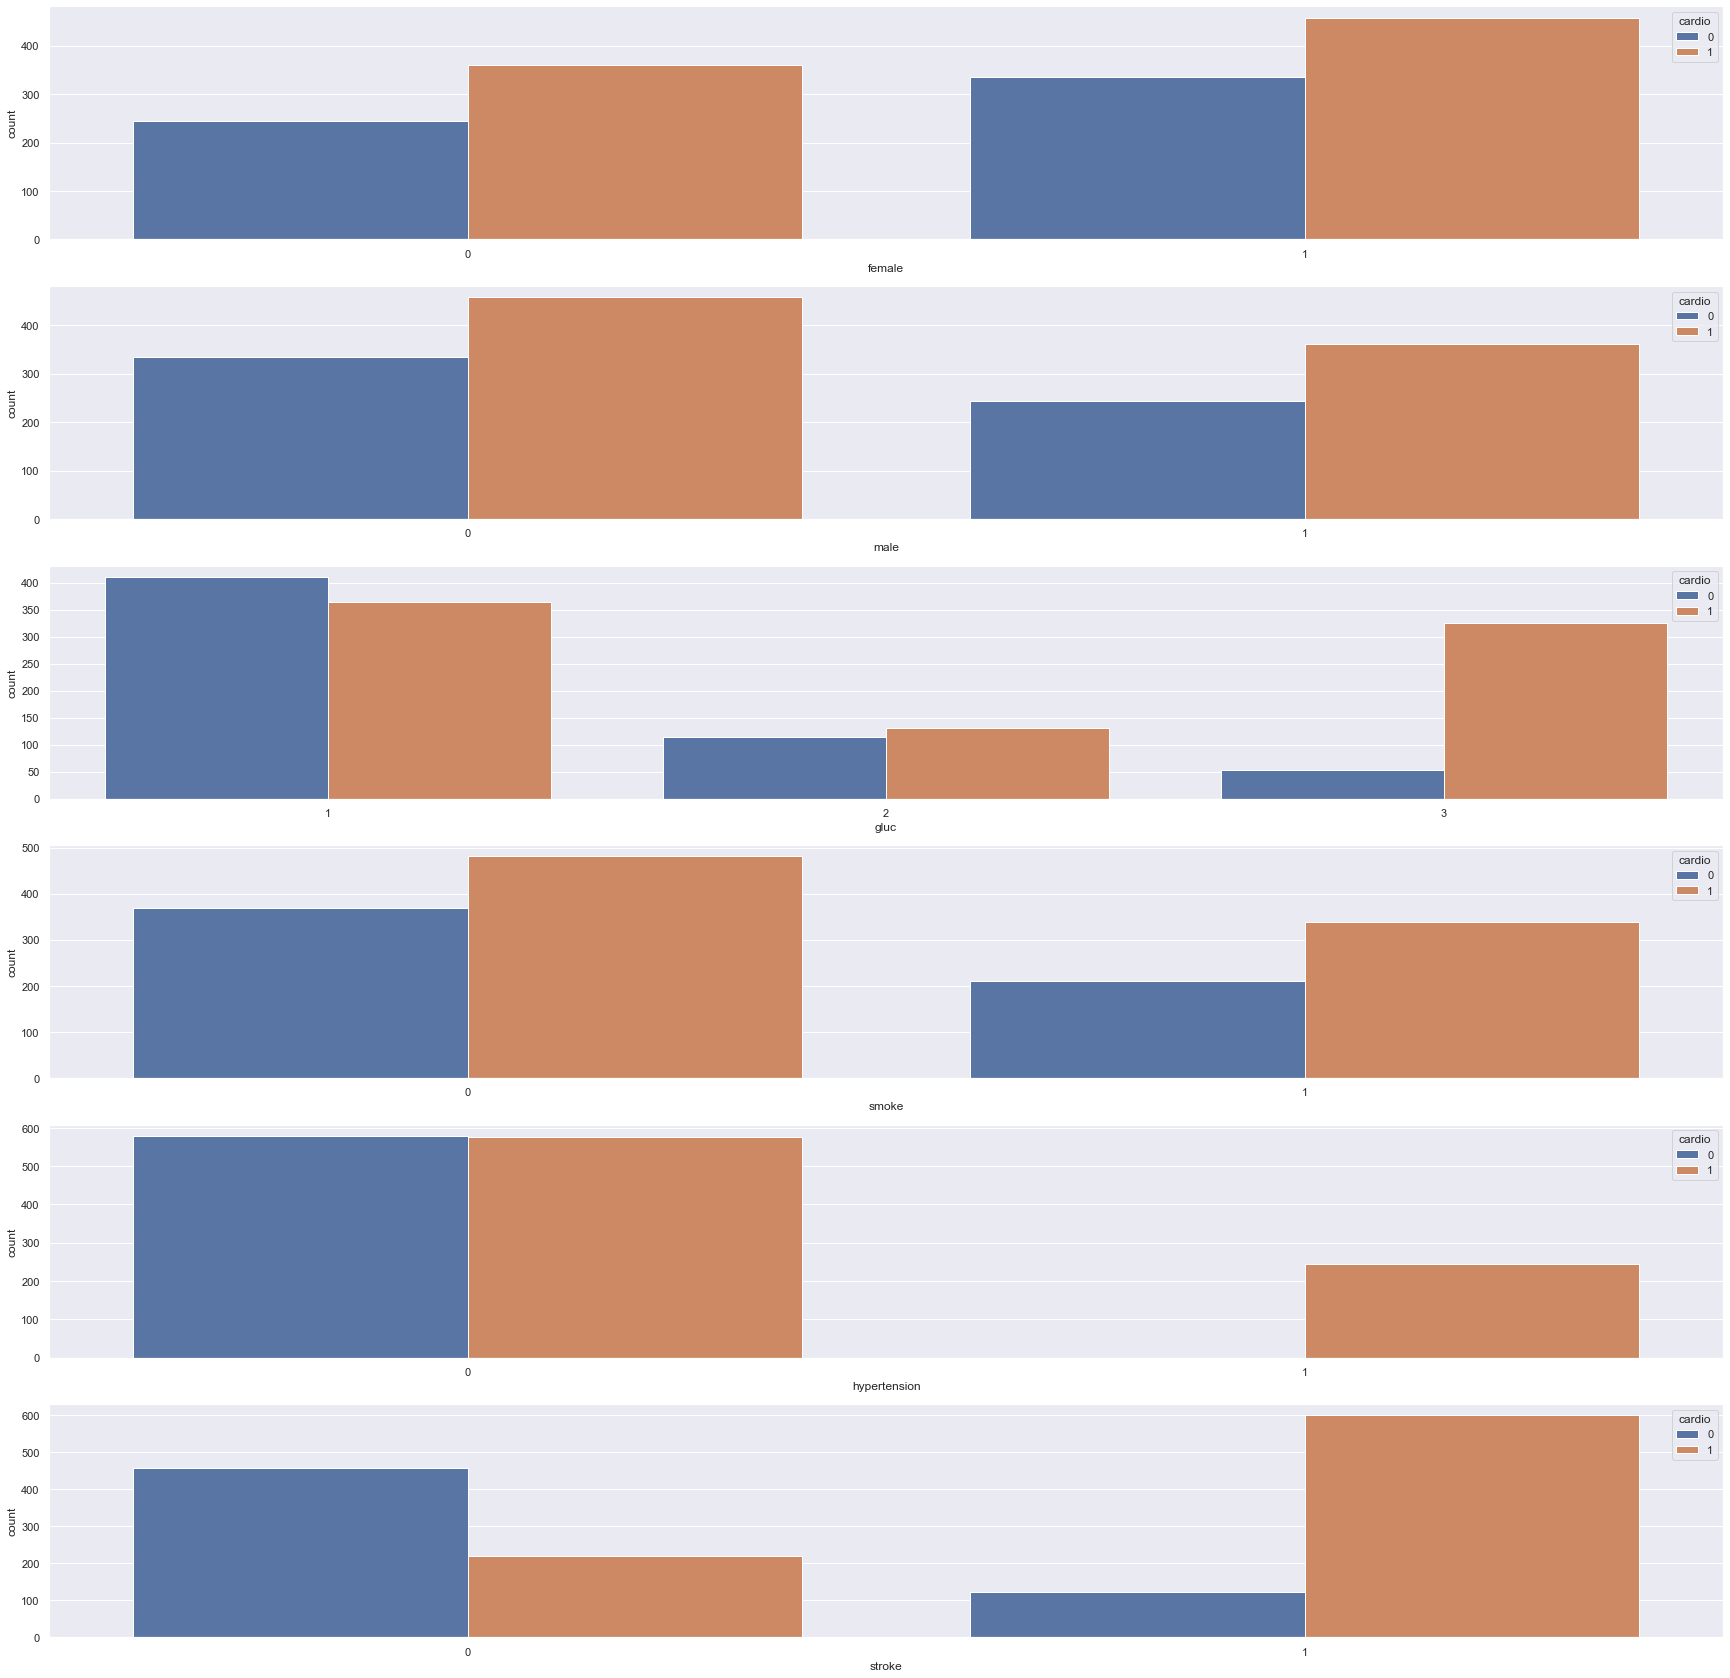

In [164]:
#Visualising the categorical variables against cardio
f ,axes = plt.subplots(6, 1, figsize=(30, 30))

for i,val in enumerate(["female", "male", "gluc", "smoke", "hypertension", "stroke"]):
    sb.countplot(x=val, hue="cardio", data=new, ax=axes[i]);

### Observations:

#### Gender
* There are more females than males in the stroke dataset. Additionally, the are more people that are predicted to have cardiovascular disease in both genders. This is supported from our previous observation of the majority of the patients being the elderly and overweight

#### Gluclose
* Patients who are within normal range(1) does not affect having cardiovascular disease, as there is an even distribution of patients with and without disease.
* However, patients who have are diabetic(3) are much more likely to have cardiovascular disease

#### Smoke
* We can see that smoking does not seem to affect having cardiovascular disease, as there are more patients having cardiovascular disease regardless of whether they smoke

#### Hypertension
* Patients without hypertension does not affect having cardiovascular disease.
* However, an interesting observation is that all the patients who have hypertension are predicted to have cardiovascular disease. This suggets that having hypertension may be an important factor that causes cardiovascular disease

#### Stroke
* We see that a large number of patients with stroke are predicted to have cardiovascular disease as well. This is also part of our aim of the project, where we will attempt to find a relationship between the two variables.

---

# Testing relationship between cardio and stroke

To better understand whether stroke and cardio are related to each other, a chi-square test can be used as an effective statistical tool.    

We will conduct a Chi-Square Test of Independence to test if two variables might be correlated or not.


## Defining null hypothesis and alternate hypothesis
> H₀ (Null Hypothesis)      — stroke and cardio are independent of each other   
> H₁ (Alternate Hypothesis) — stroke and cardio are dependent of each other   

Let significance level α = 0.05, we will draw our conclusions based on the following p-value conditions:
> p < 0.05 — We reject the null hypothesis, this means stroke and cardio are correlated    
> p > 0.05 — We accept the null hypothesis, this means stroke and cardio are not correlated    

In [165]:
targets = new.copy()
targets.drop(["age", "gluc", "smoke", "bmi", "hypertension", "female", "male"], axis=1, inplace=True)
targets

,stroke,cardio
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
1393,1,1
1394,1,1
1395,1,1
1396,1,1


In [166]:
contingency = pd.crosstab(targets['stroke'], targets['cardio'], margins= True)
contingency

cardio,0,1,All
stroke,,,
0,457,219,676
1,122,600,722
All,579,819,1398


In [167]:
from scipy.stats import chi2_contingency 

value = np.array([contingency.iloc[0][0:4].values,
                  contingency.iloc[1][0:4].values])
print(chi2_contingency(value)[0:3])

(369.95427191394486, 4.628609854215814e-81, 2)


From above, 1.80204e-93 is the p-value.     
As the p-value is lesser than 0.05, we reject the NULL hypothesis. Therefore, we can conclude that stroke and cardio are related to each other.

---

## Determine the causal relationship between stroke and cardio

We will attempt to detect a causal relationship using Bayesian structure learning, through the `bnlearn` module

We will fit our entire dataset to produce a causality model that is represented via a Directed Acrylic Graph (DAG). 
When we have an edge E(u,v), it indicates that v is caused by u

In [168]:
import bnlearn as bn

We first use domain knowledge to set some prefined edges. Since our model uses the predictors to predict our target variable cardio, hence we will set an edge from each of our variables to cardio

In [169]:
predictors = ['age', 'hypertension', 'gluc', 'bmi', 'smoke', 'female', 'male']

edges = [(i, 'cardio') for i in predictors]

In [170]:
model = bn.structure_learning.fit(new, fixed_edges=edges)

# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model = bn.independence_test(model, new, alpha=0.05, prune=True)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [smoke <-> cardio] [P=0.0671273] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [female <-> cardio] [P=0.506014] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [male <-> cardio] [P=0.506014] is excluded because it was not significant (P<0.05) with [chi_square]


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


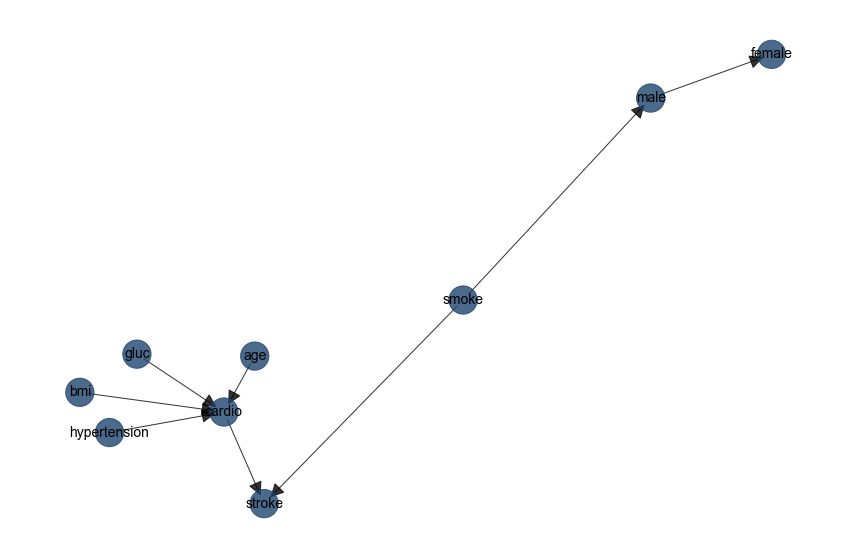

In [178]:
# Plot our causality model
G = bn.plot(model)

In [172]:
from tabulate import tabulate

print(tabulate(model['independence_test'], tablefmt="grid", headers="keys"))

+----+--------------+----------+-------------+--------------+--------------+-------+
|    | source       | target   | stat_test   |      p_value |   chi_square |   dof |
+====+==============+==========+=============+==============+==============+=======+
|  0 | age          | cardio   | True        | 1.10662e-158 |     990.672  |    77 |
+----+--------------+----------+-------------+--------------+--------------+-------+
|  1 | gluc         | cardio   | True        | 3.83331e-36  |     163.099  |     2 |
+----+--------------+----------+-------------+--------------+--------------+-------+
|  2 | smoke        | male     | True        | 2.59192e-08  |      30.9913 |     1 |
+----+--------------+----------+-------------+--------------+--------------+-------+
|  3 | smoke        | stroke   | True        | 9.0721e-06   |      19.6975 |     1 |
+----+--------------+----------+-------------+--------------+--------------+-------+
|  4 | bmi          | cardio   | True        | 0.000373243  |    

### Observations:

In our previous chi-squared test, we showed that stroke and cardio are dependent on each other.
In the DAG produced, we can observe that stroke is caused by cardio

Our next step is to use probability theory to calculate the probability of a patient getting stroke given that he has cardio

In [173]:
model = bn.parameter_learning.fit(model, new, methodtype='ml', verbose=0)

In [174]:
query = bn.inference.fit(model, variables=['stroke'], evidence={'cardio': 1})
query

[bnlearn] >Variable Elimination..


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+----+----------+----------+
|    |   stroke |        p |
+====+==========+==========+
|  0 |        0 | 0.268169 |
+----+----------+----------+
|  1 |        1 | 0.731831 |
+----+----------+----------+


<DiscreteFactor representing phi(stroke:2) at 0x1a646346c70>

### Observations:

We see that there is a 73% chance that someone will get a stroke, given that he has cardiovascular disease. Our observations are supported by online research, which shows that the same biological processes that cause heart failure also cause disease of the blood vessels. This leads to blood clot formation thus causing someone to have a stroke. With a shockingly high rate of 73%, it definitely highlights the dangers of cardiovascular disease

---

# Factors to reduce the risk of having cardiovascular disease

Now that we know the dangers of cardiovascular disease, our last step of the project is to find out what are the key factors that may lead to someone having cardiovascular disease. Therefore, we break down our model to find out the feature importance.

In [175]:
from xgboost import plot_importance
from matplotlib import pyplot

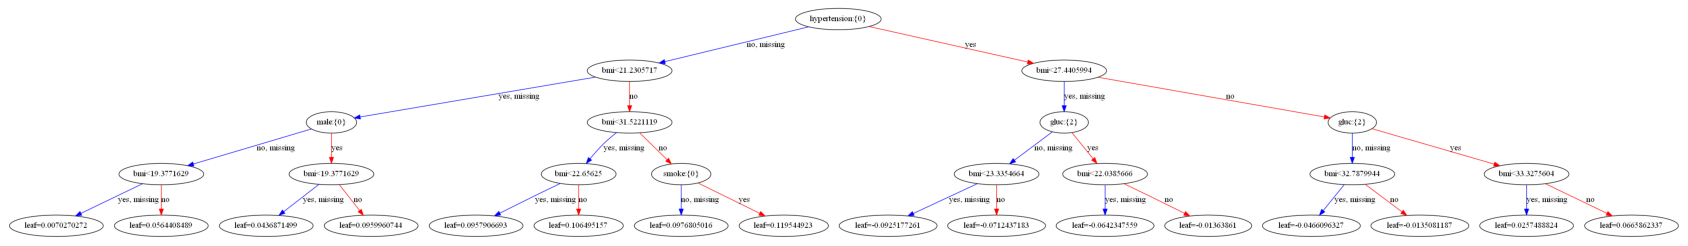

In [176]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(final_cl, ax=ax)
plt.show()

fig.set_size_inches(50, 25)
fig.savefig('tree.png')

### Observations/Data-Driven insights:

- Hypertension is the first node in the tree, suggesting that it has relatively high importance as well. 

- From the diagram, we see that **BMI** is the next biggest factor in determining whether a patient has heart disease. In fact, most of the branching in the tree uses **BMI** to decide. 

- We noticed an interesting result regarding patients with **hypertension**. Patients without hypertension fall in the right half of the tree. An observation is that the **BMI** values in the second last level is higher, ranging from 22.0 to 33.2. Recall that the healthy **BMI** range is between 18.5 to 24.9. This means that even if a patient has a high **BMI**, he may not have heart disease as long as he does not have hypertension.

- On the other hand, patients with **hypertension** belong in the left half of the tree. An observation is that the **BMI** values are lower, ranging from 19.3 to 22.6. This means that if a patient has **hypertension**, he will need to have a healthy **BMI** level in order to not have heart disease. 

- We also see that having a **glucose level** of 2 (pre-diabetic) affects having heart disease as well. As high blood sugar can damage blood vessels and the nerves that control your heart. People with diabetes are also more likely to have other conditions that raise the risk for heart disease.

- Finally, we notice that the variable **age** is not in the tree at all, suggesting that our model did not take into account the patient's **age** when making a decision. Even though the elderly (65 and older) are more susceptible to heart disease, it is still possible to not get heart disease by staying healthy (having a healthy BMI range and glucose level, no hypertension). 

---
### Other Evidence:



Hypertension (High blood pressure) forces the heart to work harder to pump blood to the rest of the body, which increases the risk of heart attack. Therefore, it is logical that having hypertension leads to heart disease. Exercising regularly and having a healthy diet reduces the risk of having high blood pressure, which again stresses the importance of having a healthy lifestyle.

BMI is the leading factor in causing heart disease. High BMI leads to factors such as obesity, which is a risk factor causing heart disease. According to John Hopkins Medicine, "Over 12 years, those who were the most obese (BMI of 35 or higher) developed the most heart failure."
   

---

The order of importance of variables causing heart disease/stroke

1. Hypertension
2. BMI
3. glucose levels
4. age
---
### Conclusion

After using XGBoost on our data, we have found that:
   - there is a moderate chance of getting stroke if one has heart disease. 
   
   - hypertension is the most important factor leading to heart disease. 

Since these 4 variables cause heart disease, which also leads to stroke, let us try to find ways to reduce the occurence of these variables. We will focus mainly on the more important factors like hypertension.


# Recommendations 

### How to prevent ourselves from getting heart disease/stroke:



#### Reduce Hypertension:

1. Stick to a healthy diet

Avoid foods high in cholesterol and saturated fats such as:

- Animal fats
- Eggs (Health Promotion Board recommends consuming no more than 4 egg yolks per week)
- Red meat (e.g. beef and lamb)
- Coconut milk
- Palm oil

Instead, choose:

- Lean meats
- Fish
- Low-fat dairy products


2. Exercise regularly

Exercise at least five times a week to lower your high blood pressure. 

3. Watch your weight

It has been proven that maintaining a healthy body weight reduces the risk of high blood pressure.

---

#### Reduce BMI:

Since BMI = mass in kg / (height in m) ^ 2, and height is a constant for adults, in order to decrease BMI, we have to reduce our mass. Coincidentally, sticking to a healthy diet and exercising regularly has been proven to reduce weight. These factors are the same as mentioned for reducing hypertension

---

#### Reduce glucose levels:
Similarly, to reduce glucose levels, we simply need to exercise regularly and to stick to a healthy diet 

---

#### Reduce age:
This is impossible to be reduced. It is also the least important factor.

---


## Final Thoughts:

As we can see, there are really only 2 main things we can do to reduce the risk of getting heart disease, and hence stroke.

1. Stick to a healthy diet 
2. Exercise Regularly
  
Fortunately, both can be easily done if one is willing to put in the effort.

We hope that everyone will put in the effort to stick to a healthy diet and exercise regularly, as this is something that can be easily done. It will come a long way in helping to reduce the risks of getting heart disease and hence, stroke. Hence, we will be able to reduce the number of commonly occuring chronic diseases. 
